In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import polars as pl

from summarytools import dfSummary
from skimpy import skim

In [8]:
data=pd.read_csv("/home/maryam/Downloads/Titanic-Dataset.csv")

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [14]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,PassengerId[int64],Mean (sd) : 446.0 (257.4)min < med < max:1.0 < 446.0 < 891.0IQR (CV) : 445.0 (1.7),891 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB8ElEQVR4nO3Xv27aYBhH4ddWikxAtvhTuICO3ZBYuICOvdheBENnhi6d2JCQZYSbqBZ11yxJMVaTnuo8K/x4v+EMSdK2bUj/uvStHyBd4+6tH6D/R5Ikw4gY3Dj/2bbtw3Mf/jHUnsfTiPh147bvnnqb+u5sOp1+KopidMv4dDqVSZJ8eS7WF0NNkmQ4m80+53k+6Xr4crm8q+v6w3g8/p6mafOae+pt6rsjIpqmySLi43q9/jqfz09dtlVVZdvtdnI8HgcR0T3UiBjkeT7ZbDYPRVE8djm+3+8nu93u/Wq1+rZcLssu27576m3qu5/s77MsaxaLxY+u+4gYvvThVX+jFkXx2PV4WZbDiIjRaNR523dPvU1999P93+J//UIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVwt01X6qqKuv6w+fzOYuIqOs6OxwO96+5p96mvrvv/pq+fgOe9DS+8Np05AAAAABJRU5ErkJggg=="">",0(0.0%)
2,Survived[int64],1. 02. 1,549 (61.6%)342 (38.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABNElEQVR4nO3bQWrDMBRF0a9iQjORMAYvJovoYrsI7cYYa9CETNRB9/Ak+u5ZwU+4GBL8Uu89AIUUEfeIuI0+xNi79/4cfYTCsm3bV855HX2Iq9bamVL6dghuyTmvj8fjWUp5jT7GzXVdn7XW9TiOW0T8/9giIkopr33ff0YfY+o++gCVj9EHwAexQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yS8TfS3yjD3Hk9r0vrbWz1rqG0Ut8M2mtnRHxHn2HAoOX8WwGL4kpH1Tcnmw2T5EZWU35nGZzM7KZ8rnN5mbkNuXjF/dA/KkLGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2RspnwOn3F2VlM+p9ncjBi8QOYXCltq37DnnSoAAAAASUVORK5CYII="">",0(0.0%)
3,Pclass[int64],1. 32. 13. 2,491 (55.1%)216 (24.2%)184 (20.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABl0lEQVR4nO3bQWrbYBSF0aciQjORMAYvxovoYrsI7cYYa5CETJRBJi20s+T+P9I5K3iYDxsJ32HbtoKEH60P4DiGqnquqqfWh+zM+7Ztr62P6M14Pp9/TdN0an3Inqzreh+G4bfg/jZO03S6Xq+v8zy/tT5mDx6Px89lWU632+2pqsT2h7Gqap7nt8vl8tL6mB15bn1AjzwgECM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNmrPr8D1brQ/bCZ/l/47qu92VZTuU/WF9mXdd7Vb23vqM3NgjfwwbhHwZTPlJ6/mbz7bAz3a6rLJT2p8t1lYXSPvW8rvJ0vDNe6hIjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjpst1VW/38DW6XVdZKO2PDQIx1lXEeEAgpoefUT+XB9F8ymeydxxNp3wme8fSw5Svq1cufB8PCMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIaTrlM9k7luZTPpO947BBIMaUj5gPSryjSkEJaC0AAAAASUVORK5CYII="">",0(0.0%)
4,Name[object],"1. Dooley, Mr. Patrick2. Braund, Mr. Owen Harris3. Cumings, Mrs. John Bradley (Fl4. Heikkinen, Miss. Laina5. Futrelle, Mrs. Jacques Heath (6. Allen, Mr. William Henry7. Moran, Mr. James8. McCarthy, Mr. Timothy J9. Palsson, Master. Gosta Leonard10. Johnson, Mrs. Oscar W (Elisabe11. other",1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)881 (98.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADXElEQVR4nO3cwWkbYRRG0TdGOPZGQhhcQtKDi0ixKUJFpAdjPIvY8WaySBYpINwB5ZwK/sWFh2A+Ldu2DRRu9n4A/w+xkREbGbGRERsZsZERGxmxkREbGbGRuVmW5cuyLHd7P4TrdzMzn2fm094P4fo5o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5mZmvs/Mz70fwvVb/IsRFWeUjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRE

In [15]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 891    │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA   ┃ NA %    ┃ mean     ┃ sd       ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ PassengerId    │    0 │       0 │      446 │    257.4 │     1 │  223.5 │    446 │  668.5 │    891 │ ▇▇▇▇▇▇ │  │
│ │ Survived       │    0 │       0 │   0.3838 │   0.4866 │     0 │      0 │      0 │      1 │      1 │ ▇    ▅ │  │
│ │ Pclass         │    0 │       0 │    2.309 │   0.8361 │     1 │      2 │      3 │      3 │      3 │ ▃  ▃ ▇ │  │
│ │ Age            │  177 │   19.87 │     29.7 │    14.53 │  0.42 │  20.12 │     28 │     38 │     80 │ ▂▇▇▃▁  │  │
│ │ SibSp          │    0 │       0 │    0.523 │    1.103 │     0 │      0 │      0 │      1 │      8 │   ▇    │  │
│ │ Parch          │    0 │       0 │   0.3816 │   0.8061 │     0 │      0 │      0 │      0 │      6 │  ▇▁▁   │  │
│ │ Fare           │    0 │       0 │     32.2 │    49.69 │     0 │   7.91 │  14.45 │     31 │  512.3 │   ▇    │  │
│ └────────────────┴──────┴─────────┴──────────┴──────────┴───────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA       ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Name                     │        0 │          0 │                          4.1 │                     3626 │  │
│ │ Sex                      │        0 │          0 │                            1 │                      891 │  │
│ │ Ticket                   │        0 │          0 │                          1.3 │                     1130 │  │
│ │ Cabin                    │      687 │       77.1 │                         0.27 │                      238 │  │
│ │ Embarked                 │        2 │       0.22 │                            1 │                      889 │  │
│ └──────────────────────────┴──────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [16]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
# Lable Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [20]:
print(data["Embarked"].value_counts())
data["Embarked"]= data["Embarked"].map({"S":0,"C":1,"Q":2})

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [22]:
data["Embarked"].value_counts()

Embarked
0.0    644
1.0    168
2.0     77
Name: count, dtype: int64

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0


In [24]:
data= data.drop(["Name","PassengerId","Ticket","Cabin"],axis=1)

In [25]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

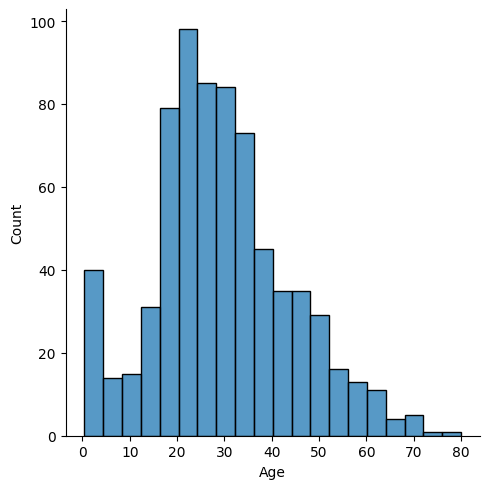

In [26]:
sns.displot(x= data["Age"])


In [27]:
# Distribution of the Age is skewed so we use median for null values
(data.Age.isnull().sum()/len(data))*100

19.865319865319865

In [28]:
data.loc[data["Age"].isnull()==True,"Age"]=data.Age.median()


In [29]:
data.loc[data["Embarked"].isnull()==True,"Embarked"]=0

In [30]:
data["Embarked"].value_counts()

Embarked
0.0    646
1.0    168
2.0     77
Name: count, dtype: int64

In [31]:
data.Age.mode()

0    28.0
Name: Age, dtype: float64

In [33]:
data.duplicated().sum()

116

In [34]:
data.drop_duplicates()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,2.0
887,1,1,0,19.0,0,0,30.0000,0.0
888,0,3,0,28.0,1,2,23.4500,0.0
889,1,1,1,26.0,0,0,30.0000,1.0


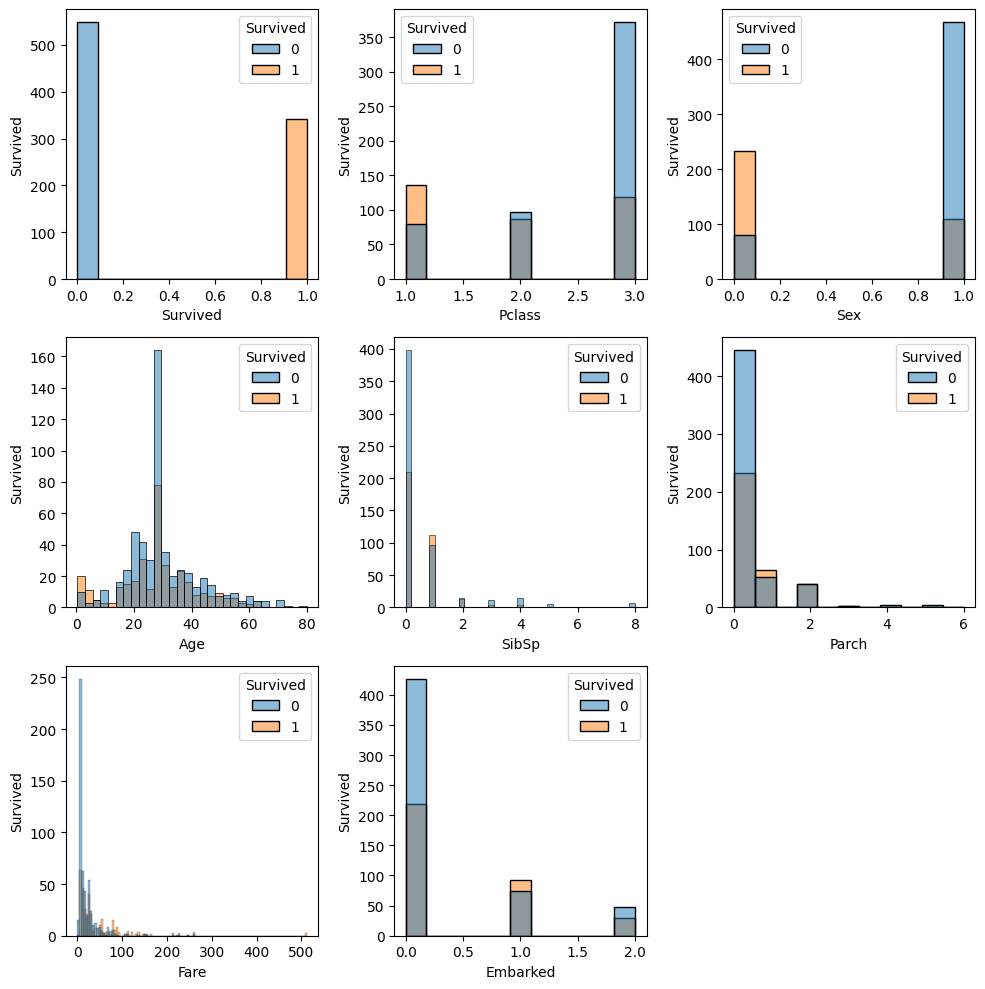

In [35]:
# Histplot
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10,10))
i=1
for col in data:
    if i <9:
        ax= plt.subplot(3,3,i)
        sns.histplot(x=data[col],hue=data['Survived'])
        plt.xlabel(col)
        plt.ylabel('Survived')
    i=i+1
plt.tight_layout()

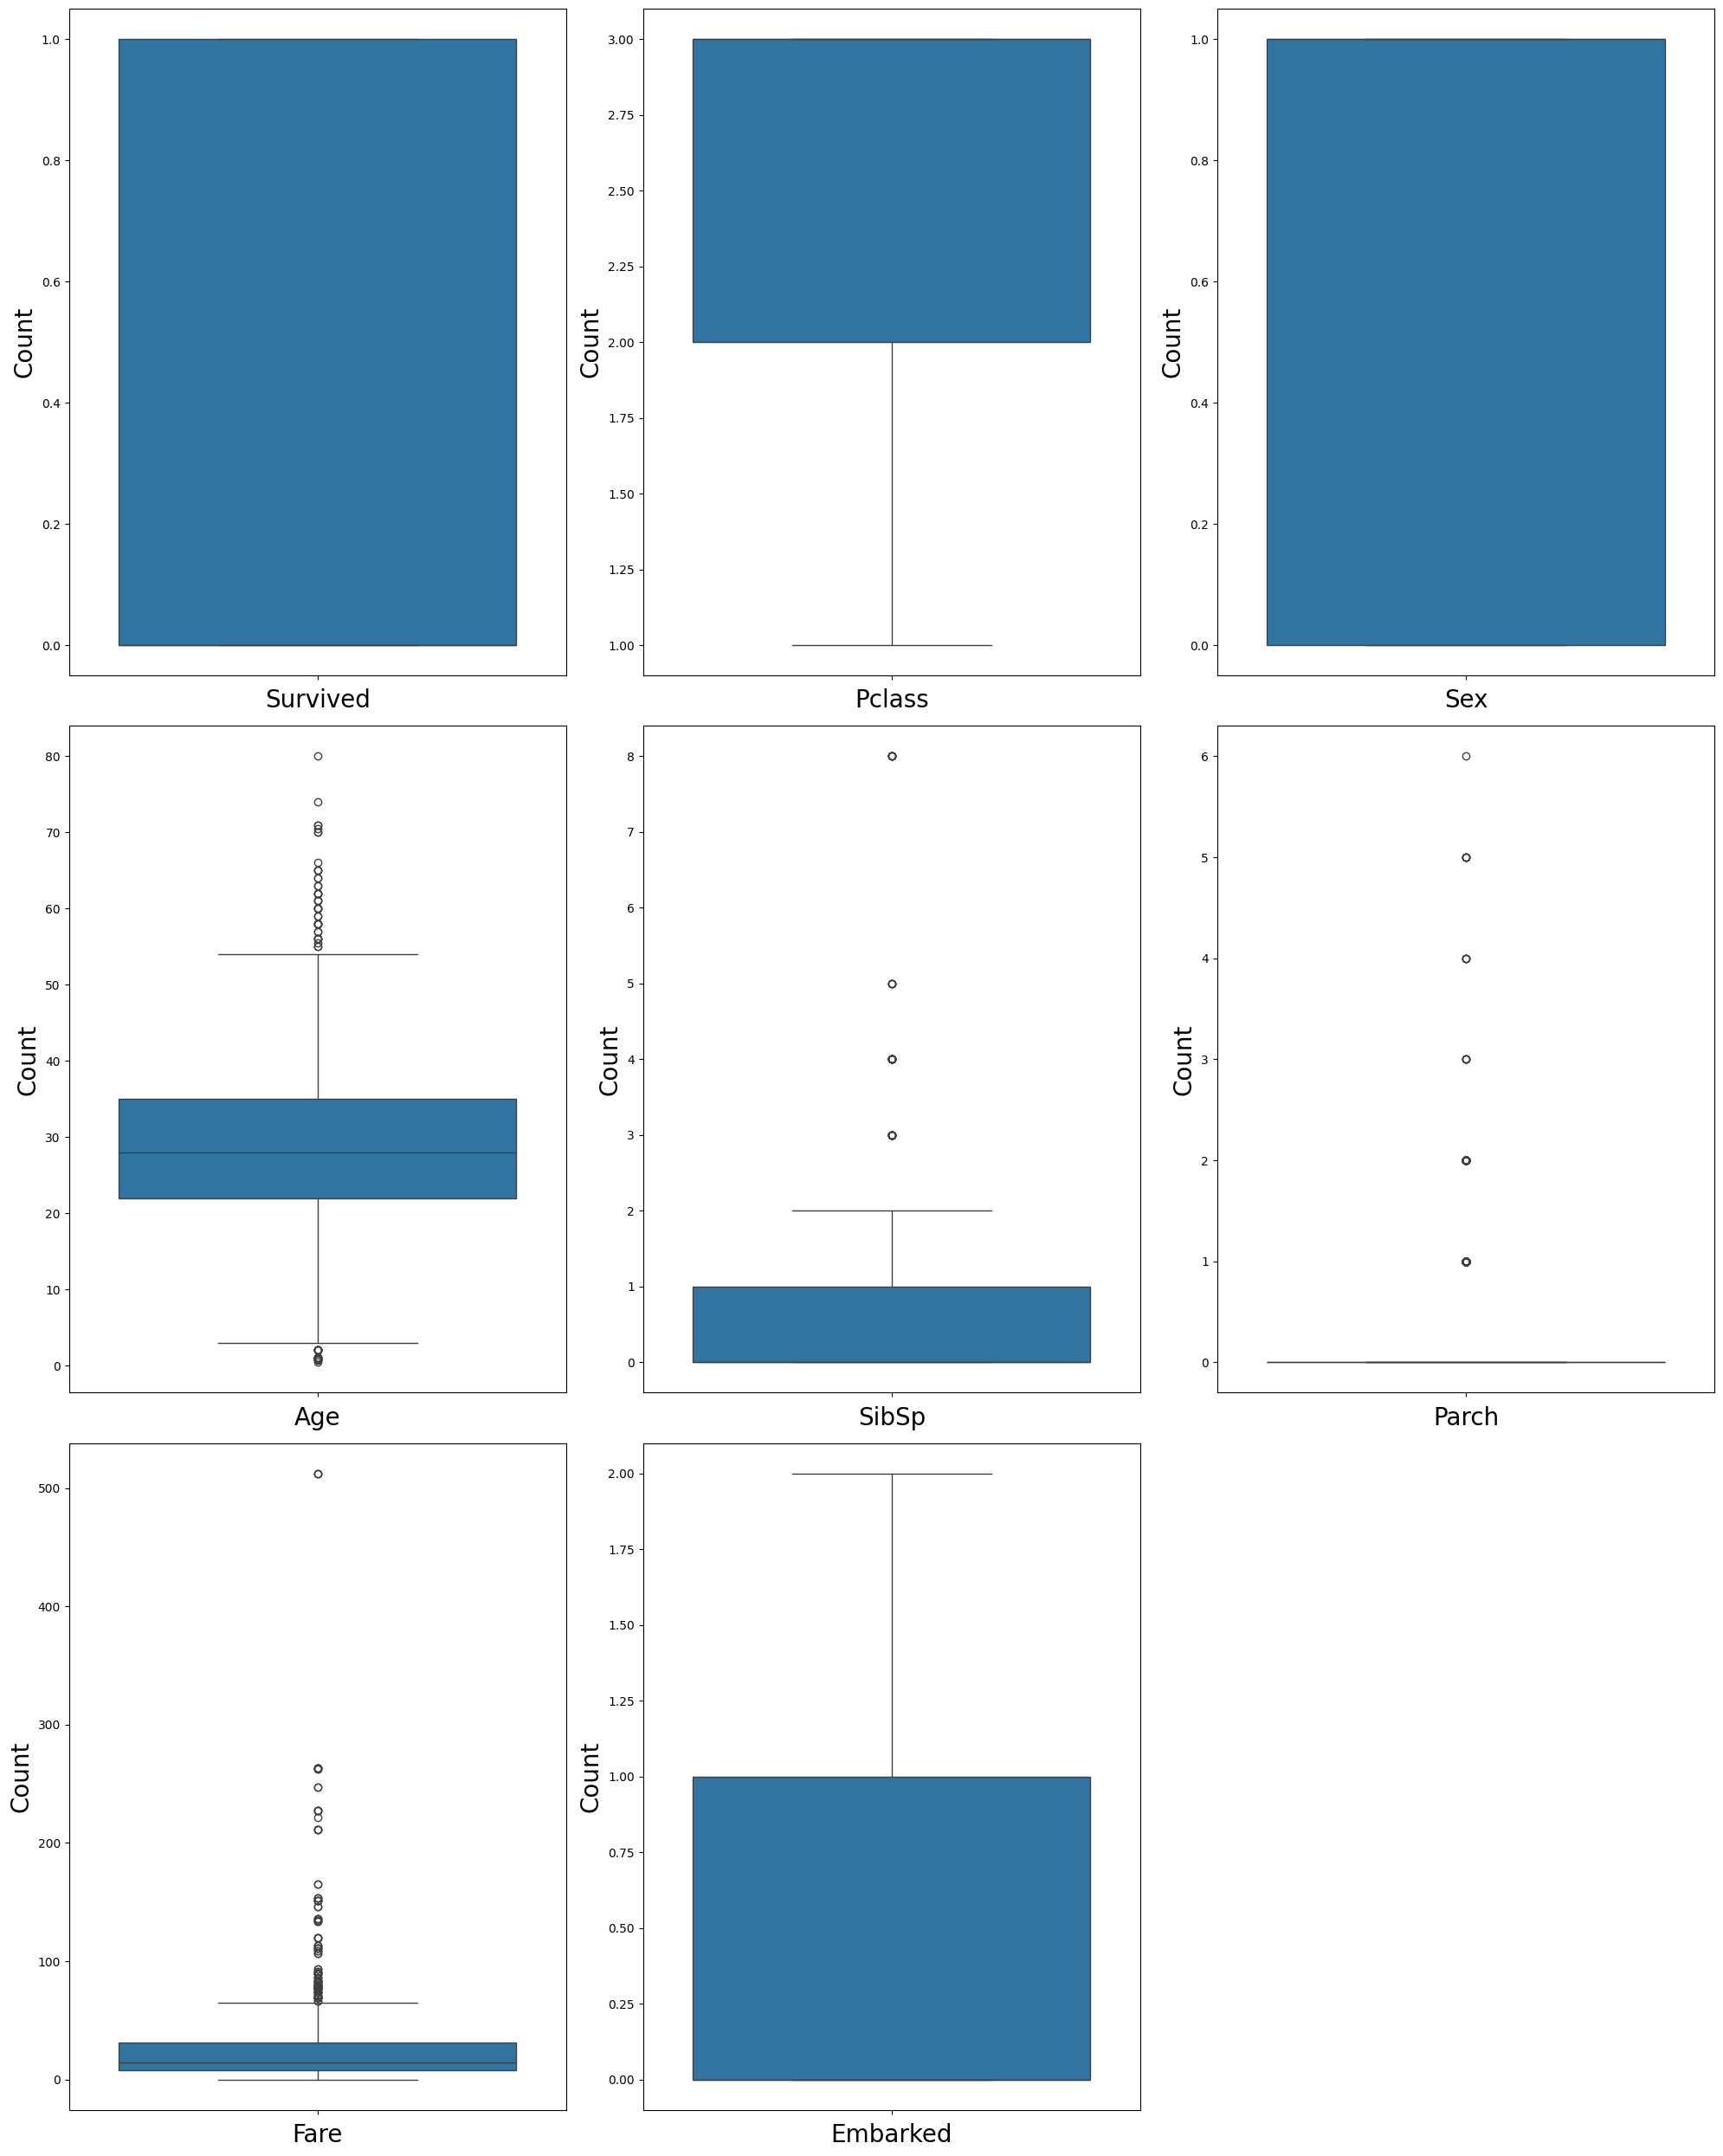

In [36]:
import warnings
warnings.filterwarnings("ignore")

#Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [40]:
# Handling the outlier for Age
q1 = data["Age"].quantile(0.25)
q3 = data["Age"].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
data = data[(data["Age"] >= lower_limit) & (data["Age"] <= upper_limit)]

In [41]:
# Handling the outlier Fare
q1 = data["Fare"].quantile(0.25)
q3 = data["Fare"].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
data = data[(data["Fare"] >= lower_limit) & (data["Fare"] <= upper_limit)]

In [42]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [43]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
d1= ["Survived",'Pclass', 'Sex','SibSp', 'Parch','Embarked']
data1=sc.fit_transform(data.drop(d1,axis=1))
data1=pd.DataFrame(data1,columns= ['Age', 'Fare'])

In [44]:
data1.shape

(718, 2)

In [45]:
con_data= data[["Survived",'Pclass', 'Sex','SibSp', 'Parch','Embarked']]

In [46]:
con_data.shape

(718, 6)

In [47]:
data1_reset = data1.reset_index(drop=True)
con_data_reset = con_data.reset_index(drop=True)
df = pd.concat([data1_reset, con_data_reset], axis=1)

In [48]:
df.shape

(718, 8)

In [50]:
df.isnull().sum()

Age         0
Fare        0
Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

<Axes: >

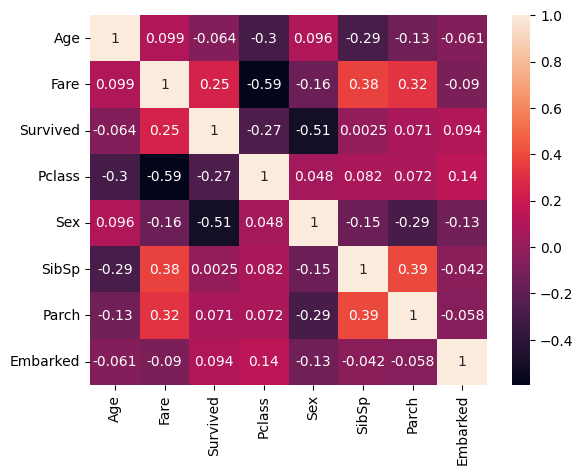

In [51]:
sns.heatmap(df.corr(),annot= True)

In [52]:
df.columns

Index(['Age', 'Fare', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')

In [53]:
x= df[["Age", 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']]
y= df["Survived"]


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
x_test.shape

(144, 7)

In [56]:
x_train.shape

(574, 7)

In [57]:
clf=LogisticRegression()

clf.fit(x_train,y_train)


LogisticRegression()

In [58]:
y_pred=clf.predict(x_test)

In [59]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score

In [61]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
# Count of Actual output PREDICTED OUPUT

[[81 14]
 [18 31]]


In [62]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Survived,,
0,81,14
1,18,31


In [63]:
cr=classification_report(y_test,y_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.82      0.85      0.84        95
           1       0.69      0.63      0.66        49

    accuracy                           0.78       144
   macro avg       0.75      0.74      0.75       144
weighted avg       0.77      0.78      0.78       144

